Simple RNN Model using CuDNNLSTM in Backend 
(WILL REQUIRE GPU, PREFERABLY NVIDIA LISTED FOR BETTER PERFORMANCE)

In [288]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#static attributes (MUST BE CHANGED PER USAGE)
pt_age=36 #age of plant that is being monitored, can be variable (modifications in code will have to be made)
att_fixed=3 #number of attributes that are fixed : in this case obs_num, plantage and wavelength, not for prediction
PATH="C:/Users/yash2/Downloads"#add folder location
f_name="Book1.csv"#add file name for training
t_name="test1.csv"#add test name (this file only has obs_num, plantage and wavelength as its inputs, for prediction purposes)



filename_train=os.path.join(PATH,f_name)
filename_test=os.path.join(PATH,t_name)

df=pd.read_csv(filename_train)
df_train=df.values

df_test=pd.read_csv(filename_test)


x=np.array(df_train[:,0:att_fixed], dtype=np.float64)

y=np.array(df_train[:,att_fixed:], dtype=np.float64)



test=df_test.values
test=test.reshape(test.shape[0], test.shape[1], 1)
x_test=np.array(test[:,0:att_fixed], dtype=np.float64)

#RNN requires 3-D arrays, so we will reshape
x=x.reshape(x.shape[0], x.shape[1], 1)
y=y.reshape(y.shape[0], y.shape[1], 1)
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size=0.2)





In [285]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.datasets import imdb
from tensorflow.keras.callbacks import EarlyStopping


#LSTM model with CuDNNLSTM Architechture (since there is no activation function, it automatically picks up CuDNN (for TensorFlow new versions, otherwise you have to specify within imports)).
#The function must be modified according to usage, these are default weights/values set
#You might need to download CUDA libraries for this to work
model = Sequential()
model.add(LSTM(64, dropout=0.0, recurrent_dropout=0.0,input_shape=(None, 1)))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)
pred=[]
for i in range(0,len(y[0])):
    model.fit(x_train,y_train[:,i],validation_data=(x_val, y_val[:,i]),
          callbacks=[monitor],verbose=2,epochs=1000)
    pred.append(model.predict(x_test)) #loading the model predictions in an array, attribute-wise corresponding to values in y
    
    



Epoch 1/1000
3/3 - 0s - loss: 120906.3047 - val_loss: 161753.9219
Epoch 2/1000
3/3 - 0s - loss: 120556.0391 - val_loss: 161332.0312
Epoch 3/1000
3/3 - 0s - loss: 120191.7188 - val_loss: 160898.0938
Epoch 4/1000
3/3 - 0s - loss: 119845.9609 - val_loss: 160429.5781
Epoch 5/1000
3/3 - 0s - loss: 119458.8203 - val_loss: 159911.4219
Epoch 6/1000
3/3 - 0s - loss: 118999.0859 - val_loss: 159317.2188
Epoch 7/1000
3/3 - 0s - loss: 118513.2578 - val_loss: 158618.8281
Epoch 8/1000
3/3 - 0s - loss: 117933.1562 - val_loss: 157800.7188
Epoch 9/1000
3/3 - 0s - loss: 117233.0547 - val_loss: 156847.4688
Epoch 10/1000
3/3 - 0s - loss: 116405.6250 - val_loss: 155745.7500
Epoch 11/1000
3/3 - 0s - loss: 115492.1797 - val_loss: 154478.8594
Epoch 12/1000
3/3 - 0s - loss: 114433.7188 - val_loss: 153048.4219
Epoch 13/1000
3/3 - 0s - loss: 113224.7656 - val_loss: 151457.4844
Epoch 14/1000
3/3 - 0s - loss: 111863.7969 - val_loss: 149724.5938
Epoch 15/1000
3/3 - 0s - loss: 110469.5391 - val_loss: 147857.2344
Epoc

Epoch 127/1000
3/3 - 0s - loss: 1549.7271 - val_loss: 2106.3442
Epoch 128/1000
3/3 - 0s - loss: 1467.6627 - val_loss: 1979.9607
Epoch 129/1000
3/3 - 0s - loss: 1383.0048 - val_loss: 1881.4355
Epoch 130/1000
3/3 - 0s - loss: 1306.1224 - val_loss: 1774.0686
Epoch 131/1000
3/3 - 0s - loss: 1239.3116 - val_loss: 1679.4095
Epoch 132/1000
3/3 - 0s - loss: 1171.6674 - val_loss: 1595.1667
Epoch 133/1000
3/3 - 0s - loss: 1114.7844 - val_loss: 1507.1033
Epoch 134/1000
3/3 - 0s - loss: 1050.5131 - val_loss: 1424.9537
Epoch 135/1000
3/3 - 0s - loss: 997.8172 - val_loss: 1341.5715
Epoch 136/1000
3/3 - 0s - loss: 940.3008 - val_loss: 1275.5164
Epoch 137/1000
3/3 - 0s - loss: 893.0396 - val_loss: 1199.6071
Epoch 138/1000
3/3 - 0s - loss: 842.7959 - val_loss: 1131.8044
Epoch 139/1000
3/3 - 0s - loss: 791.5554 - val_loss: 1070.5431
Epoch 140/1000
3/3 - 0s - loss: 749.2529 - val_loss: 1005.0332
Epoch 141/1000
3/3 - 0s - loss: 708.5364 - val_loss: 946.7916
Epoch 142/1000
3/3 - 0s - loss: 668.7615 - val_l

Epoch 28/1000
3/3 - 0s - loss: 26.0314 - val_loss: 12.0164
Epoch 29/1000
3/3 - 0s - loss: 24.5385 - val_loss: 12.2094
Epoch 30/1000
3/3 - 0s - loss: 23.2445 - val_loss: 12.2606
Epoch 31/1000
3/3 - 0s - loss: 22.4372 - val_loss: 12.1070
Epoch 32/1000
3/3 - 0s - loss: 21.4795 - val_loss: 11.7072
Epoch 33/1000
3/3 - 0s - loss: 20.3422 - val_loss: 11.4098
Epoch 34/1000
3/3 - 0s - loss: 19.5259 - val_loss: 11.2046
Epoch 35/1000
3/3 - 0s - loss: 18.7432 - val_loss: 11.0969
Epoch 36/1000
3/3 - 0s - loss: 18.0724 - val_loss: 10.9294
Epoch 37/1000
3/3 - 0s - loss: 17.4237 - val_loss: 10.5281
Epoch 38/1000
3/3 - 0s - loss: 16.7928 - val_loss: 10.3321
Epoch 39/1000
3/3 - 0s - loss: 16.2562 - val_loss: 10.1804
Epoch 40/1000
3/3 - 0s - loss: 15.8492 - val_loss: 10.0701
Epoch 41/1000
3/3 - 0s - loss: 15.3047 - val_loss: 9.9480
Epoch 42/1000
3/3 - 0s - loss: 14.8998 - val_loss: 9.9736
Epoch 43/1000
3/3 - 0s - loss: 14.5393 - val_loss: 9.9222
Epoch 44/1000
3/3 - 0s - loss: 14.2105 - val_loss: 9.7407
E

In [286]:
for i in range(0,len(y[0])):
    print(pred[i])
    
pt_age_temp=(int(x_test[:,1][0][0]))

xtemp=x[int(x_test[:,0][0][0])-pt_age_temp:int(x_test[:,0][0][0])]
xt2=[]
for i in xtemp:
    xt2.append(i[0])

ytemp=y[int(x_test[:,0][0][0])-pt_age_temp:int(x_test[:,0][0][0])]



[[517.82043]
 [519.9157 ]
 [521.0887 ]
 [521.7715 ]
 [522.1884 ]
 [522.4546 ]
 [522.6309 ]
 [522.7508 ]
 [522.83356]
 [522.8908 ]]
[[25.00376 ]
 [24.568716]
 [23.87319 ]
 [22.944937]
 [21.811989]
 [20.503778]
 [19.05042 ]
 [17.480024]
 [15.816   ]
 [14.076044]]
[[62.09261 ]
 [61.494785]
 [60.656483]
 [59.586643]
 [58.30036 ]
 [56.819164]
 [55.169918]
 [53.381588]
 [51.48102 ]
 [49.489307]]


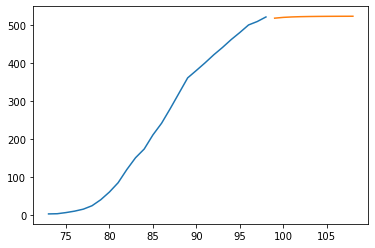

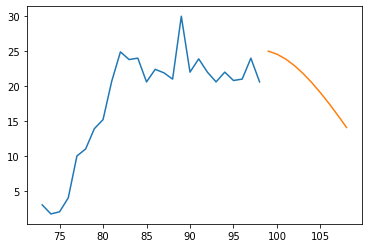

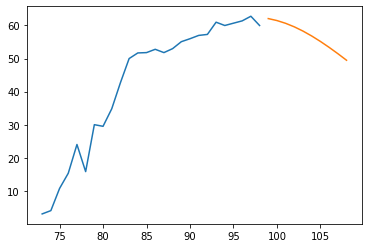

In [287]:
for i in range(0,len(y[0])):
    plt.plot(xt2, ytemp[:,i])
    plt.plot(x_test[:,0],pred[i])
    plt.show()

Another model considering Time Series Model by Tensorflow tutorial, https://www.tensorflow.org/tutorials/structured_data/time_series#baseline

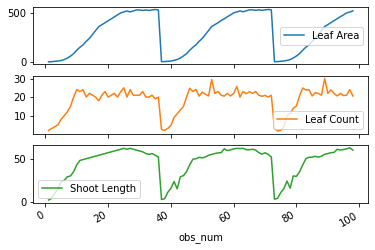

In [292]:

features_considered = ['Leaf Area', 'Leaf Count', 'Shoot Length']

features = df[features_considered]
features.index = df['obs_num']
features.head()
features.plot(subplots=True)

dataset = features.values
data_mean = dataset[:int(0.8*len(dataset))].mean(axis=0)
data_std = dataset[:int(0.8*len(dataset))].std(axis=0)

The graphs above represent the cycles of plant growth with different attributes mentioned, in this case, 'Leaf Area', 'Leaf Count', 'Shoot Length'

In [293]:
dataset = (dataset-data_mean)/data_std

In [294]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [295]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

In [296]:
def create_time_steps(length):
  return list(range(-length, 0))
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

In [297]:
future_target = 5
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 80, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             80, None, past_history,
                                             future_target, STEP)

In [298]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [299]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

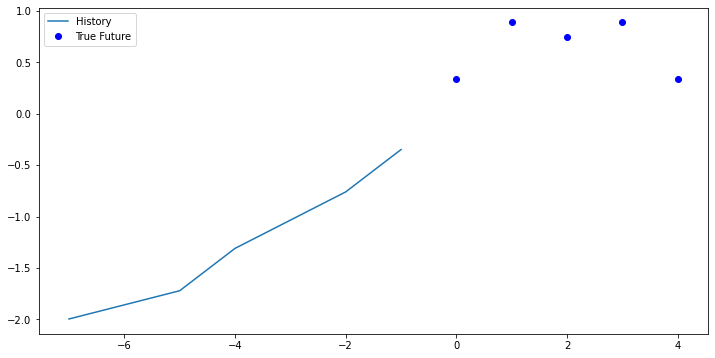

In [300]:
for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))

#plot for 5 predictions

In [301]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(5))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [302]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=10,
                                          steps_per_epoch=200,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/10
200/200 [==============================] - 2s 8ms/step - loss: 0.4714 - val_loss: 0.2626
Epoch 2/10
200/200 [==============================] - 1s 5ms/step - loss: 0.3032 - val_loss: 0.2145
Epoch 3/10
200/200 [==============================] - 1s 6ms/step - loss: 0.2626 - val_loss: 0.2138
Epoch 4/10
200/200 [==============================] - 1s 5ms/step - loss: 0.2443 - val_loss: 0.2152
Epoch 5/10
200/200 [==============================] - 1s 5ms/step - loss: 0.2265 - val_loss: 0.2065
Epoch 6/10
200/200 [==============================] - 1s 5ms/step - loss: 0.2157 - val_loss: 0.2051
Epoch 7/10
200/200 [==============================] - 1s 5ms/step - loss: 0.2083 - val_loss: 0.2055
Epoch 8/10
200/200 [==============================] - 1s 5ms/step - loss: 0.2055 - val_loss: 0.2073
Epoch 9/10
200/200 [==============================] - 1s 5ms/step - loss: 0.2025 - val_loss: 0.2060
Epoch 10/10
200/200 [==============================] - 1s 5ms/step - loss: 0.1997 - val_loss: 0.2114

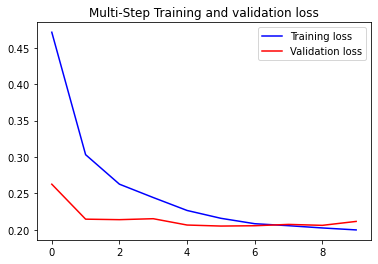

In [303]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

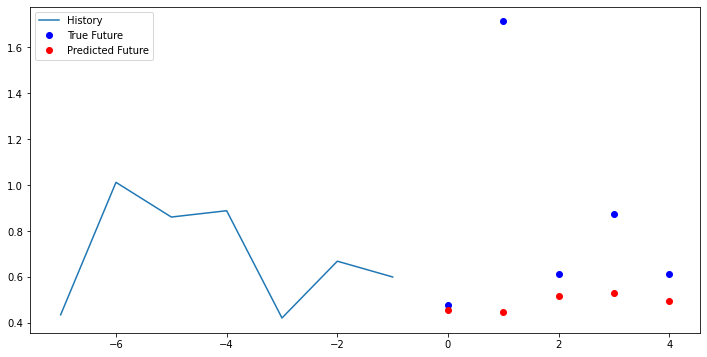

In [304]:
for x, y in val_data_multi.take(1):
  multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

#plot for 5 predictions vs true valuations